# K-means
a. Program from scratch the clustering algorithm k-means with random initialization.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from numba import njit
import os.path
import time
from scipy.spatial import distance_matrix

In [2]:
def draw(data,centroids,z,k,b,icount=0):
    data1=data[:,0]
    data2=data[:,1]
    
    plt.figure()
    for i in range(k):
        plt.plot(data1[np.where(z==i)],data2[np.where(z==i)],'o',label='%i'%i,markersize=2)
        if (b==0):
            plt.title('clustering initialization')
        else:
            plt.title('clustering at step %i'%icount)  
    plt.plot(centroids[:,0],centroids[:,1],'*k')

In [3]:
# function for k-means
# bobj=0 if you want only the objective function at the last step, 1 otherwise
# bplot=0 if you do not want plots, 1 otherwise
njit(fastmath=True)
def kmeans(data,k,bobj=0,bplot=1):

    npatt,nfeat=data.shape
    
    # 1. randomly pick k centers
    centroids=np.zeros((k,nfeat))
    inds=np.random.choice(npatt,k,replace=False)
    for i in range(k):
        centroids[i,:]=data[inds[i],:]
        
    # 2. assign each point to its nearest center
    distances=distance_matrix(data,centroids)
    z=np.zeros(npatt) # column index of the min distance per row
    zold=np.zeros(npatt)
    z=np.argmin(distances,axis=1)
    
    if (bobj==1):
        obj=0
        for i in range(k):
            inds=np.where(z==i)
            obj=obj+np.sum(np.linalg.norm(data[inds,:]-centroids[i,:],axis=1)**2)
        objs=[obj]        
    
    if (bplot==1):
        draw(data,centroids,z,k,b=0)
       
    icount=0
    while np.any(np.not_equal(z,zold)):
        zold=z
        # 3. update the k cluster centroids based on the assigned cluster membership
        for i in range(k):
            inds=np.where(z==i)
            centroids[i,:]=np.mean(data[inds,:],axis=1)
        
        # compute the objective function at each step
        if (bobj==1):
            obj=0
            for i in range(k):
                inds=np.where(z==i)
                obj=obj+np.sum(np.linalg.norm(data[inds,:]-centroids[i,:],axis=1)**2) 
            objs.append(obj)
            
        distances=distance_matrix(data,centroids)
        z=np.argmin(distances,axis=1)
        icount+=1
        
        if (bplot==1):
            draw(data,centroids,z,k,b=1,icount=icount)
        
    if (bobj==0):
        obj=0
        for i in range(k):
            inds2=np.where(z==i)
            obj=obj+np.sum(np.linalg.norm(data[inds2,:]-centroids[i,:],axis=1)**2) 
    elif (bobj==1):
        obj=np.array(objs)
            
        
    return z,icount,obj

b. Download the data set S3 from http://cs.uef.fi/sipu/datasets/ 


(5000, 2)


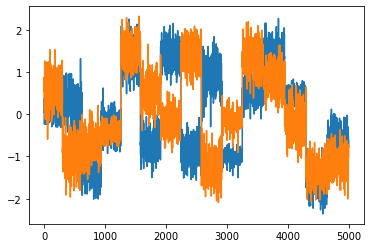

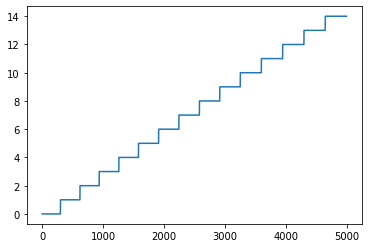

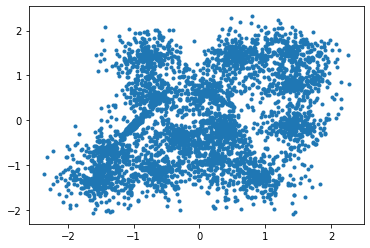

In [5]:
data = np.loadtxt('data.txt', skiprows=0, usecols=tuple(np.arange(0, 2, 1)), unpack=True).T
label = np.loadtxt('labels.txt', skiprows=0)
label=label-1 # to enumerate clusters from 0 to 14

npatt,nfeat=data.shape
print(data.shape)

for i in range(nfeat):
    data[:,i]=(data[:,i]-np.mean(data[:,i]))/np.std(data[:,i])

plt.plot(data)    
    
f=plt.figure()
plt.plot(label)

f=plt.figure()
plt.plot(data[:,0],data[:,1],'.')
plt.show()

c. Apply the algorithm with k=15 100 times, obtain the best value of the objective 
function and the average one. Plot the assignation for the best case. 

/tmp/ipykernel_8814/1063199691.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


[1121.10691296  779.84597044  653.06097763  615.67651795  603.03799782
  594.44143508  590.34019287  587.75945851  586.29986147  585.99260884
  585.88691174  585.81517615  585.6712952   585.31410985  584.79744759
  584.13695493  583.16521833  582.34054741  581.60876961  580.61752877
  579.10162388  575.05866643  567.70783074  552.96929329  539.36690312
  532.77026055  530.6518596   529.99071738  529.78865363  529.70595649
  529.55546238  529.01499646  528.46200452  527.99206043  527.72863781
  527.69397404  527.68317439  527.66730952  527.66120931]


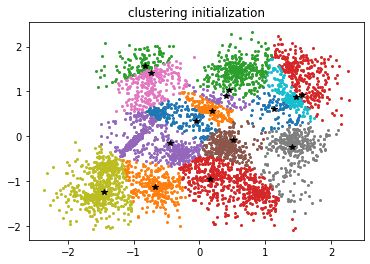

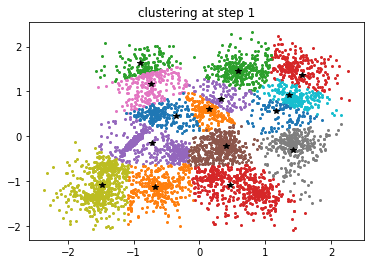

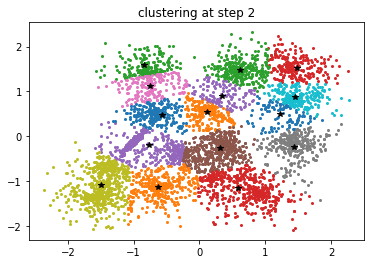

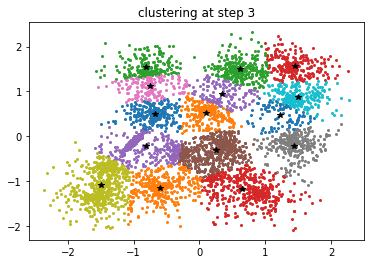

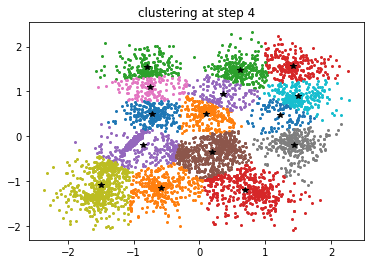

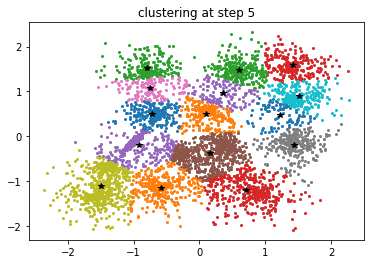

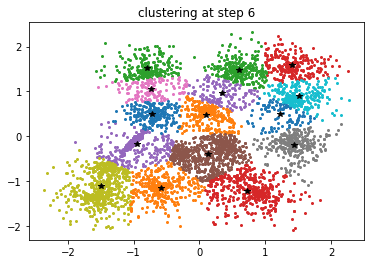

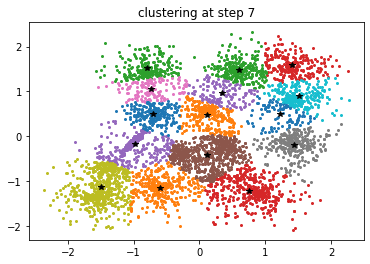

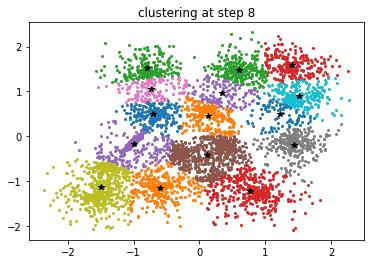

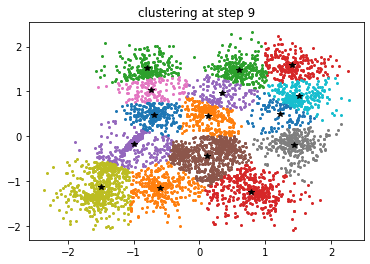

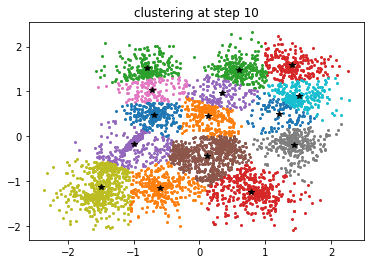

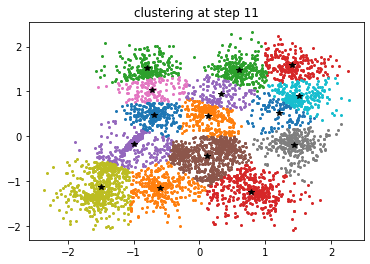

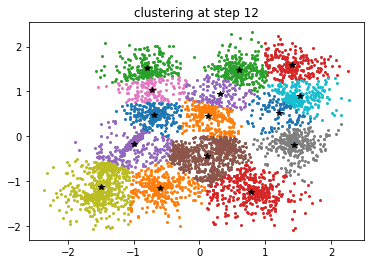

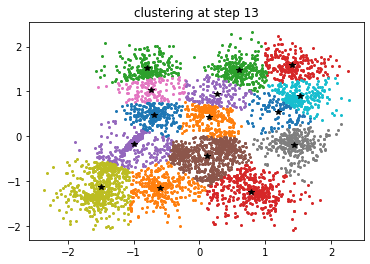

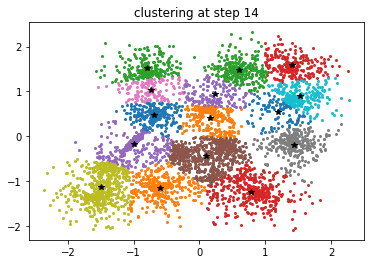

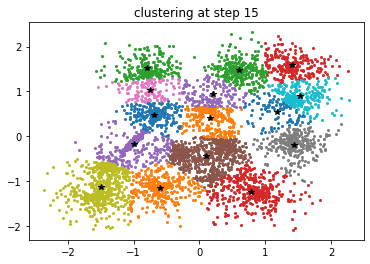

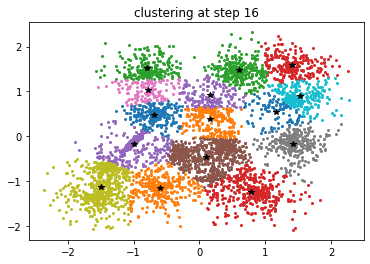

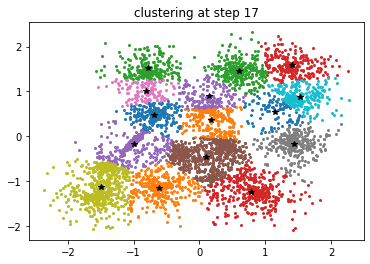

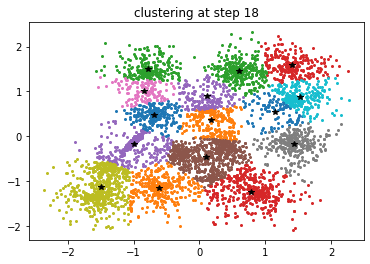

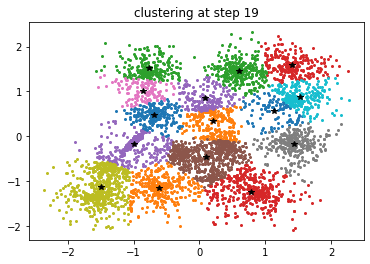

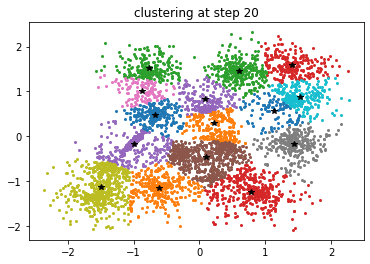

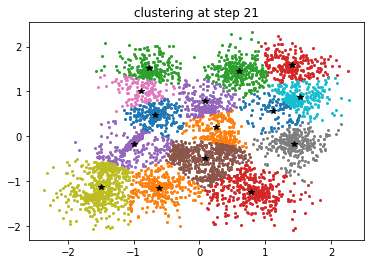

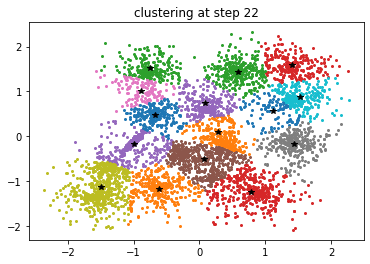

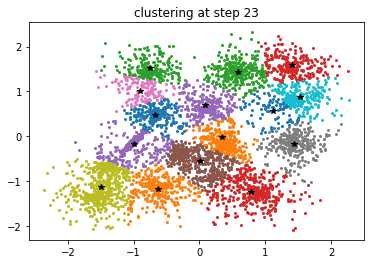

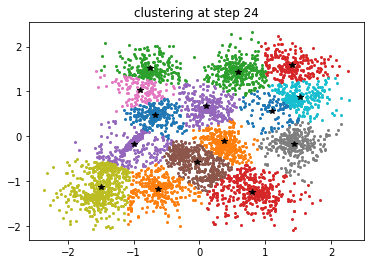

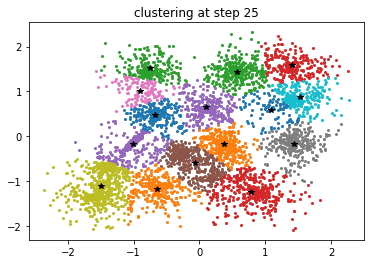

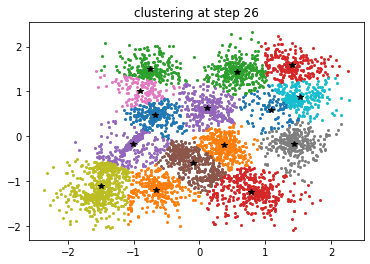

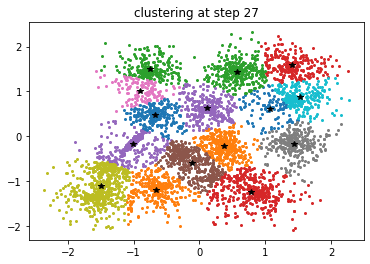

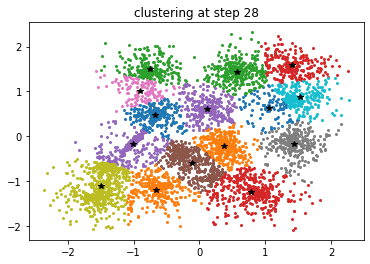

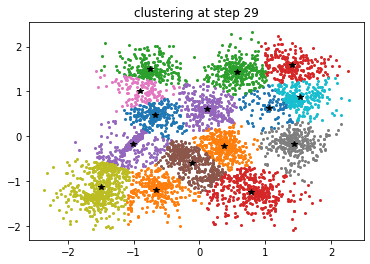

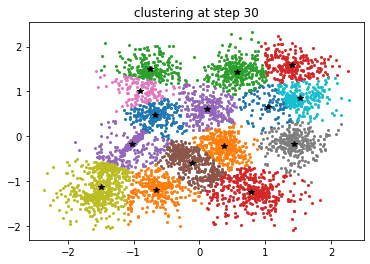

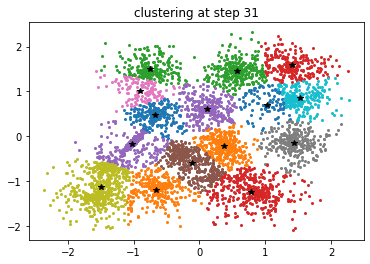

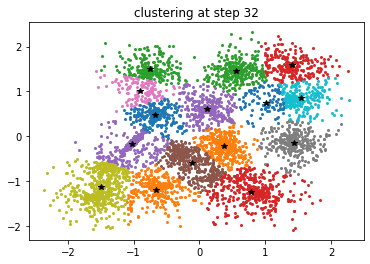

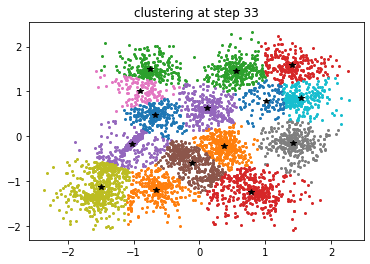

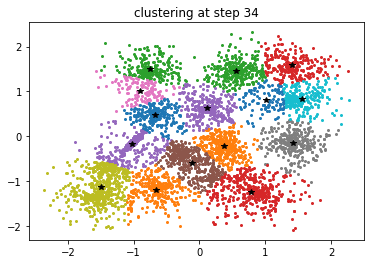

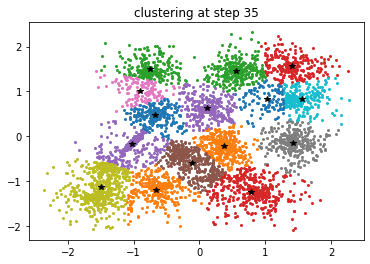

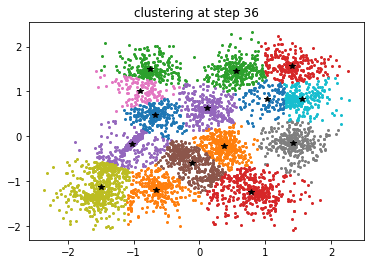

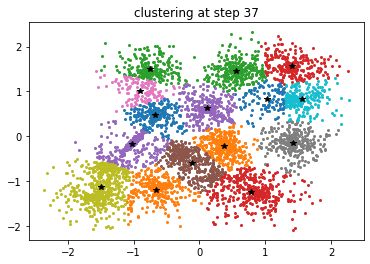

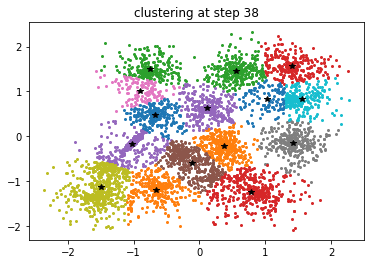

In [6]:
k=15

z,i,obj=kmeans(data,k,bobj=1)
print(obj)
#print("{:e}".format(obj))

In [7]:
N=100
z=np.zeros((npatt,N))
niters=np.zeros(N)
obj=np.zeros(N)

k=15

for i in range(N):
    z[:,i],niters[i],obj[i]=kmeans(data,k,bplot=0)

average obj function = 498.53824321854785
min obj function = 431.9904551167535


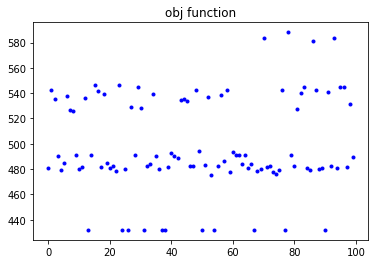

In [8]:
plt.plot(obj,'.b')
plt.title('obj function')

avobj=np.mean(obj)
minobj=np.min(obj) # the best value
print('average obj function =',avobj)
print('min obj function =',minobj)

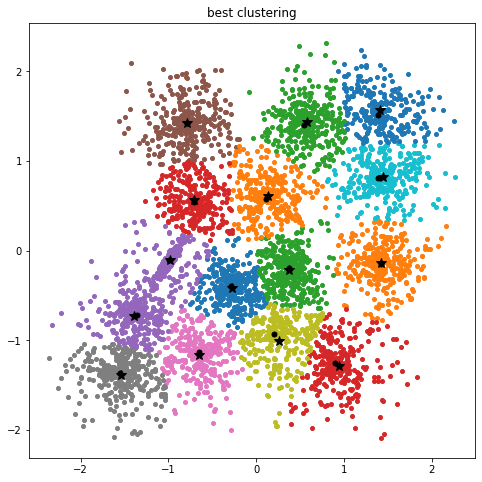

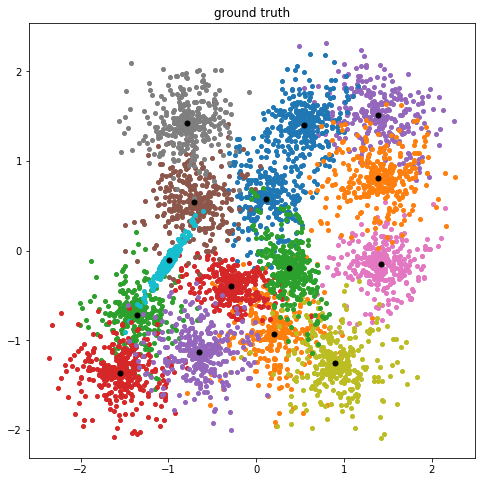

In [27]:
data1=data[:,0]
data2=data[:,1]
centroids=np.zeros((k,nfeat))
true_centroids=np.zeros((k,nfeat))

imin=np.argmin(obj)

for i in range(k):
    inds2=np.where(label==i)
    true_centroids[i,:]=np.mean(data[inds2,:],axis=1)
    
    
plt.figure(figsize=(8,6))
for i in range(k):
    plt.plot(data1[np.where(z[:,imin]==i)],data2[np.where(z[:,imin]==i)],'o',markersize=4)
    plt.title('best clustering')
    inds2=np.where(z[:,imin]==i)
    centroids[i,:]=np.mean(data[inds2,:],axis=1)
plt.plot(centroids[:,0],centroids[:,1],'*k',markersize=10)
plt.plot(true_centroids[:,0],true_centroids[:,1],'.k',markersize=10)

# ground truth
plt.figure(figsize=(8,6)) # label is from 1 to 15
for i in range(k):
    plt.plot(data1[np.where(label==i)],data2[np.where(label==i)],'o',label='%i'%i,markersize=4)
    plt.title('ground truth')
plt.plot(true_centroids[:,0],true_centroids[:,1],'.k',markersize=10)

d. Implement K-means ++ initialization in your algorithm and redo point c)

In [28]:
# function for k-means++
# bplot=0 if you do not want plots, 1 otherwise
njit(fastmath=True)
def kmeanspp(data,k,bplot=1):

    npatt,nfeat=data.shape
    
    # 1. pick k centers following the k-means ++ prescription
    centroids=np.zeros((k,nfeat))
    ind=np.random.choice(npatt,1,replace=False)
    centroids[0,:]=data[ind,:]
    
    centroid=np.zeros((1,nfeat))
    centroid[0]=centroids[1,:]
    
    distances=distance_matrix(data,centroid)
    
    for i in range(1,k):
        prob=distances**2
        prob=prob/np.sum(prob)
        ind=np.random.choice(npatt,1,replace=False,p=prob[:,0])
        centroids[i,:]=data[ind,:]
        
        centroid[0]=centroids[i,:]
        if (i<k-1):
            distancesnew=distance_matrix(data,centroid)
            distances=np.minimum(distances,distancesnew)
        
        
    # 2. assign each point to its nearest center
    distances=distance_matrix(data,centroids)
    z=np.zeros(npatt) # column index of the min distance per row
    zold=np.zeros(npatt)
    z=np.argmin(distances,axis=1)      
    
    if (bplot==1):
        draw(data,centroids,z,k,b=0)
       
    icount=0
    while np.any(np.not_equal(z,zold)):
        zold=z
        # 3. update the k cluster centroids based on the assigned cluster membership
        for i in range(k):
            ind=np.where(z==i)
            centroids[i,:]=np.mean(data[ind,:],axis=1)
        
            
        distances=distance_matrix(data,centroids)
        z=np.argmin(distances,axis=1)
        icount+=1
        
        if (bplot==1):
            draw(data,centroids,z,k,b=1,icount=icount)
    
    # compute the objective function at the final step
    obj=0
    for i in range(k):
        inds2=np.where(z==i)
        obj=obj+np.sum(np.linalg.norm(data[inds2,:]-centroids[i,:],axis=1)**2)
        
    return z,icount,obj

432.0089398442455


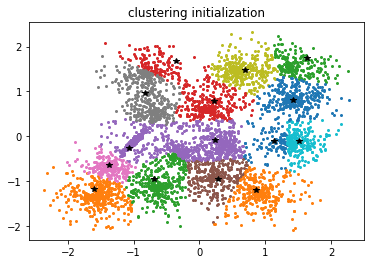

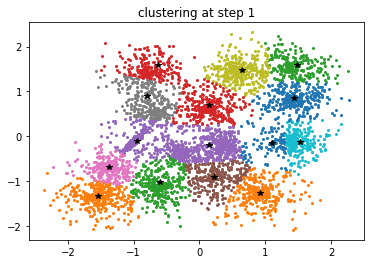

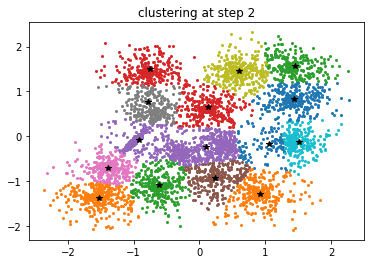

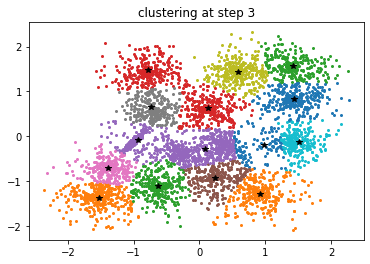

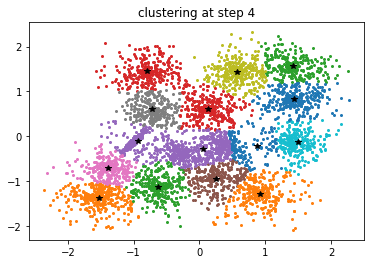

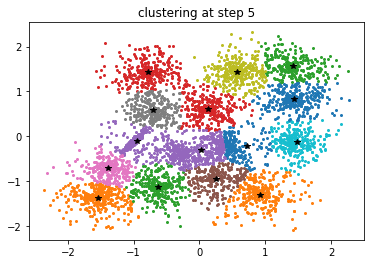

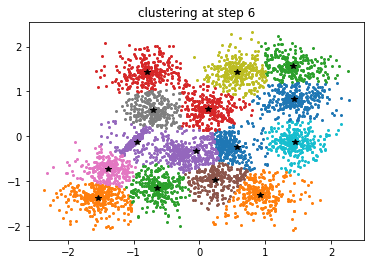

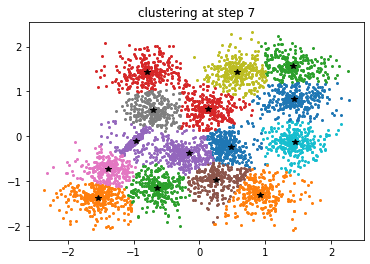

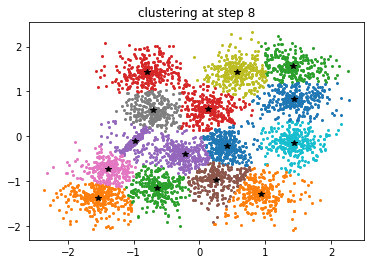

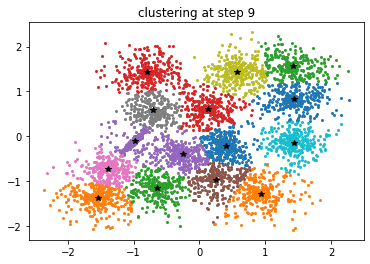

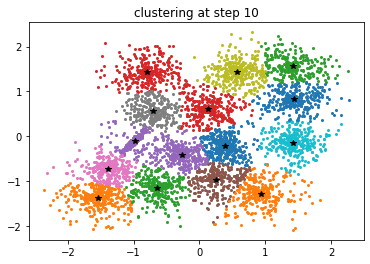

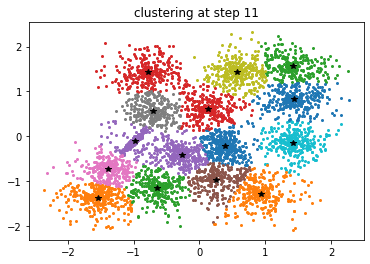

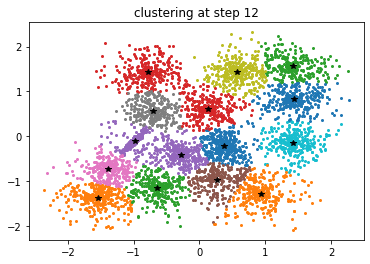

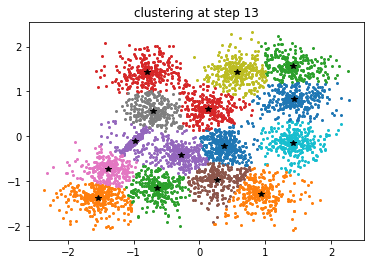

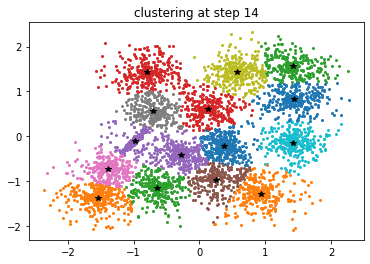

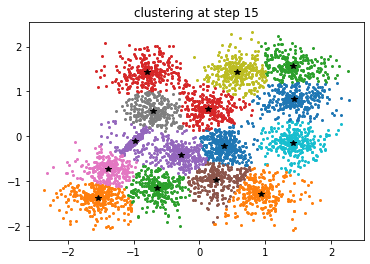

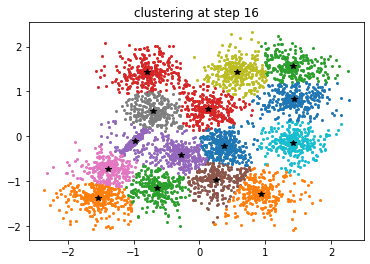

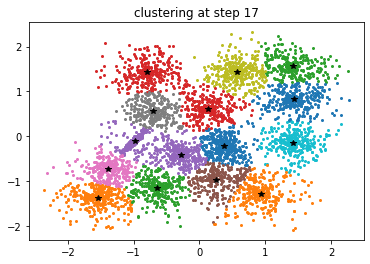

In [29]:
k=15
z,i,obj=kmeanspp(data,k)
print(obj)

In [30]:
N=100
z=np.zeros((npatt,N))
niters=np.zeros(N)
obj=np.zeros(N)

k=15

for i in range(N):
    z[:,i],niters[i],obj[i]=kmeanspp(data,k,bplot=0)

average obj function = 488.6342829245448
min obj function = 431.99075349518625


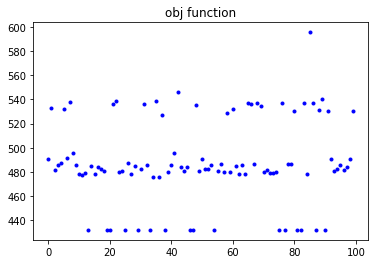

In [31]:
plt.plot(obj,'.b')
plt.title('obj function')

avobj=np.mean(obj)
minobj=np.min(obj) # the best value
print('average obj function =',avobj)
print('min obj function =',minobj)

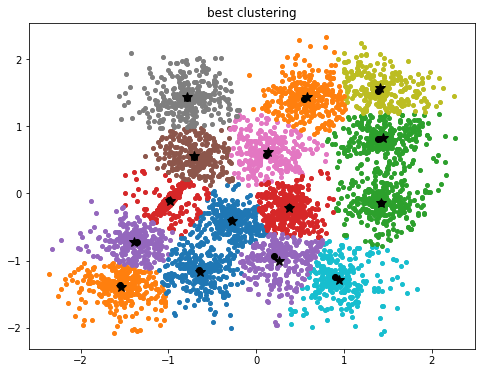

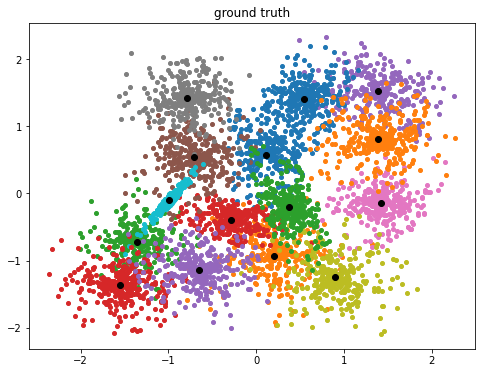

In [34]:
data1=data[:,0]
data2=data[:,1]
centroids=np.zeros((k,2))

imin=np.argmin(obj)
    
plt.figure(figsize=(8,6))
for i in range(k):
    plt.plot(data1[np.where(z[:,imin]==i)],data2[np.where(z[:,imin]==i)],'o',label='%i'%i,markersize=4)
    plt.title('best clustering')
    inds2=np.where(z[:,imin]==i)
    centroids[i,:]=np.mean(data[inds2,:],axis=1)
plt.plot(centroids[:,0],centroids[:,1],'*k',markersize=10)
plt.plot(true_centroids[:,0],true_centroids[:,1],'ok')

# ground truth
plt.figure(figsize=(8,6))
for i in range(k):
    plt.plot(data1[np.where(label==i)],data2[np.where(label==i)],'o',label='%i'%i,markersize=4)
    plt.title('ground truth')
plt.plot(true_centroids[:,0],true_centroids[:,1],'ok')

e. Perform the scree plot (with k from 2 to 20) for this data set using the best value of the
objective function.

In [73]:
N=100
mink=2
maxk=20
nk=maxk-mink+1

z=np.zeros(npatt)
zs=np.zeros((nk,npatt))
zspp=np.zeros((nk,npatt))
niters=np.zeros(nk)
niterspp=np.zeros(nk)
objs=np.zeros(nk)
objspp=np.zeros(nk)


for k in range(mink,maxk+1):
    objold=10**10
    for i in range(N):
        z,niter,obj=kmeans(data,k,bplot=0)
        if (obj<objold):
            objold=obj
            [zs[k-mink,:],niters[k-mink],objs[k-mink]]=[z,niter,obj]

In [75]:
N=20 # for k-means
for k in range(mink,maxk+1):
    objold=10**10
    for i in range(N):
        z,niter,obj=kmeanspp(data,k,bplot=0)
        if (obj<objold):
            objold=obj
            [zspp[k-mink,:],niterspp[k-mink],objspp[k-mink]]=[z,niter,obj]

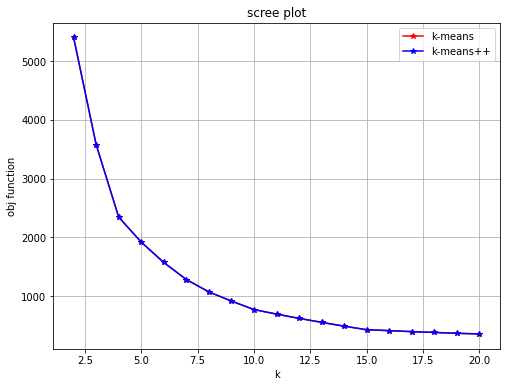

In [76]:
ks=np.arange(mink,maxk+1)
plt.figure(figsize=(8,6))
plt.plot(ks,objs,'*-r',label='k-means')
plt.plot(ks,objspp,'*-b',label='k-means++')
plt.title('scree plot')
plt.xlabel('k')
plt.ylabel('obj function')
#plt.yscale('log')
plt.grid(axis='both')
plt.legend()
plt.show()

f. modify your k-means code for obtaining k-medoids.

In [77]:
# function for k-medoids
# bplot=0 if you do not want plots, 1 otherwise
njit(fastmath=True)
def kmedoids(data,k,bplot=1):

    npatt,nfeat=data.shape
    
    # 1. randomly pick k centers
    medoids=np.zeros((k,nfeat))
    inds=np.random.choice(npatt,k,replace=False)
    for i in range(k):
        medoids[i,:]=data[inds[i],:]
        
    # 2. assign each point to its nearest center
    distances=distance_matrix(data,medoids)
    z=np.zeros(npatt) # column index of the min distance per row
    zold=np.zeros(npatt)
    z=np.argmin(distances,axis=1) 
    
    if (bplot==1):
        draw(data,medoids,z,k,b=0)
       
    icount=0
    while np.any(np.not_equal(z,zold)):
        zold=z
        # 3. update the k cluster medoids based on the assigned cluster membership
        for i in range(k):
            inds=np.array(np.where(z==i))
            datai=np.zeros((np.size(inds[0,:]),nfeat))
            datai=data[inds[0,:],:]
            
            distances2=distance_matrix(datai,datai)
            sumdistances2=np.sum(distances2,axis=1)
            j=np.argmin(sumdistances2)

            medoids[i,:]=data[inds[0,j],:]
            
        
        distances=distance_matrix(data,medoids)
        z=np.argmin(distances,axis=1)
        icount+=1
        
        if (bplot==1):
            draw(data,medoids,z,k,b=1,icount=icount)
        
    obj=0
    for i in range(k):
        inds=np.where(z==i)
        obj=obj+np.sum(np.linalg.norm(data[inds,:]-medoids[i,:],axis=1)**2) 

            
        
    return z,icount,obj

504.31689140689474


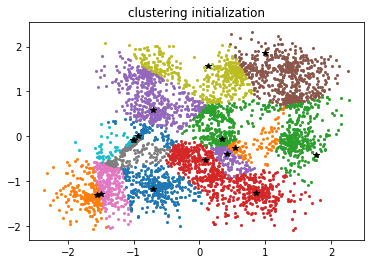

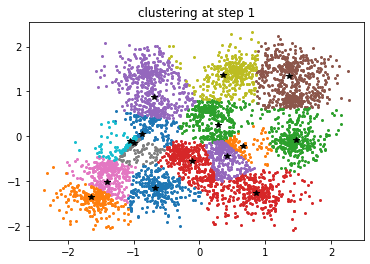

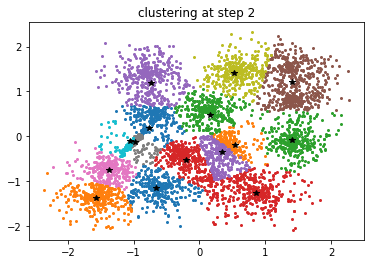

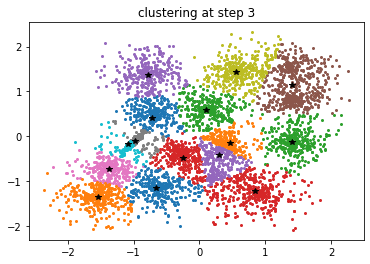

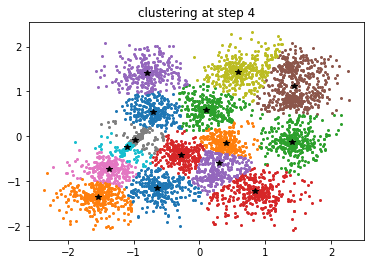

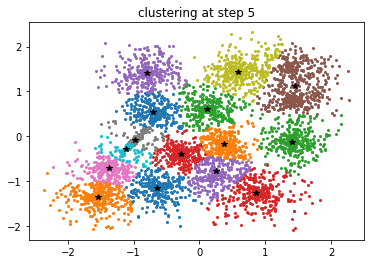

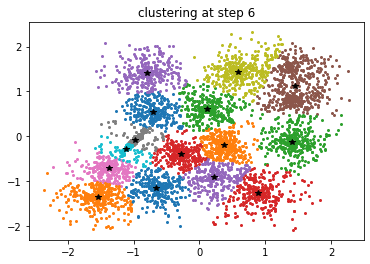

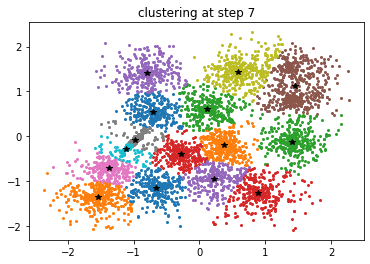

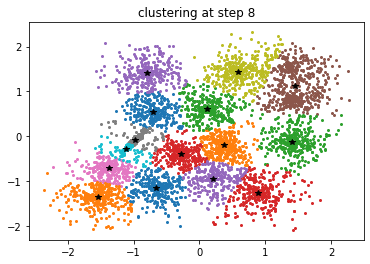

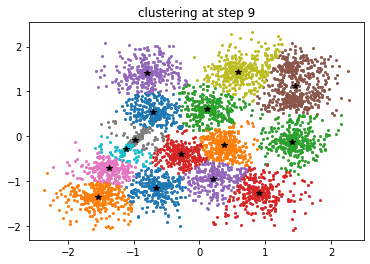

In [78]:
k=15
z,i,obj=kmedoids(data,k)
print(obj)

In [79]:
N=100
z=np.zeros((npatt,N))
niters=np.zeros(N)
obj=np.zeros(N)

k=15

for i in range(N):
    z[:,i],niters[i],obj[i]=kmedoids(data,k,bplot=0)

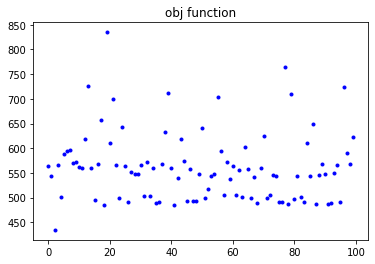

average obj function = 560.5670844795773
min obj function = 434.58880015658747


In [80]:
plt.plot(obj,'.b')
plt.title('obj function')
plt.show()

avobj=np.mean(obj)
minobj=np.min(obj) # the best value
print('average obj function =',avobj)
print('min obj function =',minobj)

In [82]:
N=20
mink=2
maxk=20
nk=maxk-mink+1

z=np.zeros(npatt)
zsmed=np.zeros((nk,npatt))
nitersmed=np.zeros(nk)
objsmed=np.zeros(nk)
            
for k in range(mink,maxk+1):
    objold=10**10
    for i in range(N):
        z,niter,obj=kmedoids(data,k,bplot=0)
        if (obj<objold):
            objold=obj
            [zsmed[k-mink,:],nitersmed[k-mink],objsmed[k-mink]]=[z,niter,obj]

KeyboardInterrupt: 

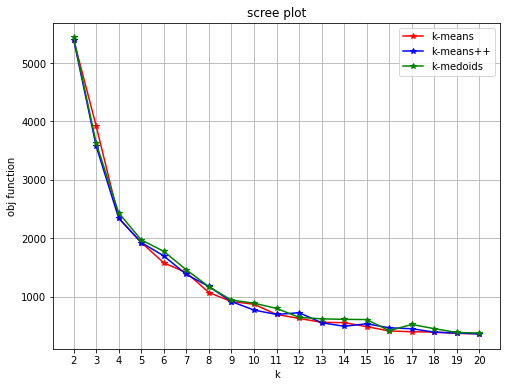

In [21]:
ks=np.arange(mink,maxk+1)
plt.figure(figsize=(8,6))
plt.plot(ks,objs,'*-r',label='k-means')
plt.plot(ks,objspp,'*-b',label='k-means++')
plt.plot(ks,objsmed,'*-g',label='k-medoids')
plt.title('scree plot')
plt.xlabel('k')
plt.xticks(range(mink,maxk+1))
plt.ylabel('obj function')
#plt.yscale('log')
plt.grid(axis='both')
plt.legend()


In [15]:
ratios=np.zeros(nk-1)
for i in range(maxk-mink):
    ratios[i]=objs[i+1]/objs[i]

plt.grid(axis='both')
plt.xlabel('n. of clusters k')
plt.ylabel('ratio obj(k)/obj(k+1)')
plt.plot(ks[0:-1],ratios,'*b')
plt.show()

NameError: name 'nk' is not defined

2. FUZZY C - MEANS

a. Modify k-means for obtaining c-means.

b. Perform the scree plot for the same data set.

c. Plot the assignation for the best case.

In [38]:
njit(fastmath=True)
def fuzzyCmeans(data,k):

    npatt,nfeat=data.shape
    centers=np.zeros((k,nfeat))
    
    # 1. random initialization of U (each row is normalized)
    U=np.random.rand(npatt,k)
    

    for i in range(npatt):
        U[i,:]=U[i,:]/np.sum(U[i,:])
    m=2 # fuzzing parameter
    
    
    # repeat until the change in U is smaller than a given threshold
    Uold=np.zeros((npatt,k))
    deltaU=np.abs(U-Uold)
    thresh=10**(-2)

    
    while (np.max(deltaU)>thresh):    
    # 2. given U, compute the centers
        for i in range(k):
            for j in range(nfeat):
                centers[i,j]=np.sum((U[:,i]**2)*data[:,j])/np.sum(U[:,i]**2)

    # 3. given the centers, update U
        Uold=+U
        
        for i in range(npatt):
            for j in range(k):
                U[i,j]=1/(np.linalg.norm(data[i,:]-centers[j,:])**(2/(m-1)))
            U[i,:]=U[i,:]/np.sum(U[i,:])
            
        deltaU=np.abs(U-Uold)
     
    # compute the objective function
    obj=0
    for i in range(npatt):
        for j in range(k):
            obj=obj+(U[i,j]**m)*np.linalg.norm(data[i,:]-centers[j,:])**2

    return centers,U,obj
    
    
    

In [39]:
k=15

start_time = time.process_time()
centers,U,obj=fuzzyCmeans(data,k)
print(time.process_time() - start_time, "seconds")

54.631117853999996 seconds


204.24516587186514


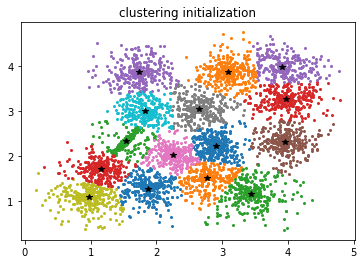

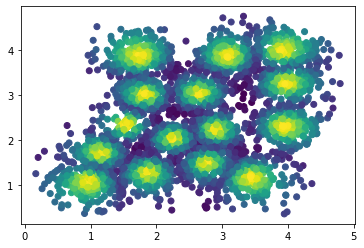

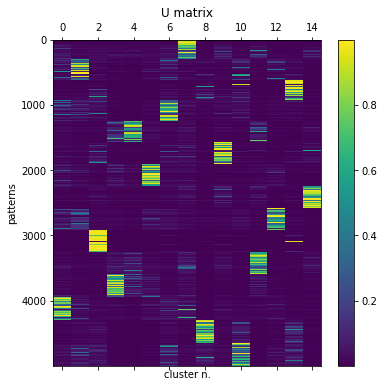

In [40]:
z=np.argmax(U,axis=1)
b=0
draw(data,centers,z,k,b)
#plt.legend()

print(obj)

plt.figure()
Umax=np.max(U,axis=1)
plt.scatter(data[:,0],data[:,1],c=Umax)

fig=plt.figure(figsize=(6,6))
matdraw=plt.matshow(U,fignum=0,aspect='auto')
plt.title('U matrix')
plt.xlabel('cluster n.')
plt.ylabel('patterns')
fig.colorbar(matdraw)

In [ ]:
N=100
mink=2
maxk=20
nk=maxk-mink+1

z=np.zeros(npatt)
zs=np.zeros((nk,npatt))
niters=np.zeros(nk)
objs=np.zeros(nk)

for k in range(mink,maxk+1):
    objold=10**10
    for i in range(N):
        z,niter,obj=fuzzyCmeans(data,k,bplot=0)
        if (obj<objold):
            objold=obj
            [zs[k-mink,:],niters[k-mink],objs[k-mink]]=[z,niter,obj]